# Experiment No. 5

### Name: Vivek Vitthal Avhad (4031)

In [26]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch, textwrap
import time
import matplotlib.pyplot as plt


In [ ]:
model_name = "gpt2-medium"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)
model.eval()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1024)
    (wpe): Embedding(1024, 1024)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPT2Block(
        (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=3072, nx=1024)
          (c_proj): Conv1D(nf=1024, nx=1024)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=4096, nx=1024)
          (c_proj): Conv1D(nf=1024, nx=4096)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1024, out_features=50257, bias=False)
)

In [28]:
prompt = """In 2050, artificial intelligence and humans will work together to"""
input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)

In [29]:

def generate_text(strategy_name, **kwargs):
    start = time.time()
    output = model.generate(
        input_ids,
        max_length=150,
        do_sample=True,
        **kwargs)
    end = time.time()
    print(f"\n{'='*40}\n{strategy_name} (Time: {end - start:.2f}s):\n{'='*40}")
    print(tokenizer.decode(output[0], skip_special_tokens=True))


In [16]:
# Temperature Sampling (Randomness Control)
generate_text("Temperature = 0.7", temperature=0.7, top_p=1.0)

# Top-k Sampling (Choose from top-k probable tokens)
generate_text("Top-k Sampling (k=50)", top_k=50, temperature=0.8)

# Top-p (Nucleus) Sampling (Cumulative Probability)
generate_text("Top-p Sampling (p=0.9)", top_p=0.9, temperature=0.9)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Temperature = 0.7 (Time: 19.83s):
In 2050, artificial intelligence and humans will work together to help bring the Earth into the 21st century, and the results will be spectacular.

We'll create a society that's both sustainable and prosperous, that is connected to our future, and that doesn't just care about the past.

But first we have to make sure people like our founders have a voice at the table.

I hope you have an opportunity to join me on this journey.

I'll also share with you the lessons I've learned over the past year as we've worked together to ensure the future we want for our children and grandchildren.

Our challenges are huge. We're not done yet.

But we've made tremendous progress.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Top-k Sampling (k=50) (Time: 17.12s):
In 2050, artificial intelligence and humans will work together to help humans make sense of the world.

It's important to recognize that our ability to reason is constrained in many ways. We have no concept of the meaning of the universe, the meaning of space or space reality. Some people believe we are not even a human.

So will our creativity, our creativity, our ability to think rationally, our ability to think creatively or even our ability to think rationally will increase? I have no way of knowing.

But I do know that if we continue to have an insatiable appetite for the latest buzzword, we will continue to lose out on the full range of human achievements.

Top-p Sampling (p=0.9) (Time: 13.99s):
In 2050, artificial intelligence and humans will work together to develop a better understanding of how we live, in ways that benefit both the machines and us.

"Achieving this is not about 'AI equals happiness,'" says Jia, "it's about the AI, like t

In [17]:

# Beam Search (Multiple best paths)
output_beam = model.generate(
    input_ids,
    max_length=100,
    num_beams=5,
    no_repeat_ngram_size=2,
    early_stopping=True)


print(f"\n{'='*40}\nBeam Search (5 Beams):\n{'='*40}")
print(tokenizer.decode(output_beam[0], skip_special_tokens=True))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Beam Search (5 Beams):
In 2050, artificial intelligence and humans will work together to solve the world's most pressing problems, from climate change to health care.

"I think we're going to see a lot more collaboration between humans and machines in the future," he said. "I don't think there's any doubt about that."


### Question 1: Modify the prompt and observe tone/style changes

In [18]:
# Q1: Tone/style adaptation by changing prompts
import torch

def run_style_tests(prompts, temperature=0.8, top_p=0.9, max_length=140, seed=42):
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    for title, prompt in prompts:
        print("\n" + "="*80)
        print(f"{title}")
        print("-"*80)
        input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)
        out = model.generate(
            input_ids,
            max_length=max_length,
            do_sample=True,
            temperature=temperature,
            top_p=top_p,
            pad_token_id=tokenizer.eos_token_id
        )
        txt = tokenizer.decode(out[0], skip_special_tokens=True)
        print(textwrap.fill(txt, width=100))

prompts = [
    ("News headline + lede", "Headline: Breakthrough in renewable energy\nStory:"),
    ("Casual tweet", "Just tried the new AI app and omg..."),
    ("Shakespearean style", "Hark! Upon the morrow's dawn, a curious engine speaketh thus:"),
]

run_style_tests(prompts)


News headline + lede
--------------------------------------------------------------------------------
Headline: Breakthrough in renewable energy Story: The world's largest solar farm in California will
provide electricity to the entire state A new solar power plant in Southern California is the
largest solar farm in the world, and the largest in California. It's also the world's largest
rooftop solar farm. The facility will be built on a 25-acre property in the San Fernando Valley. The
project, which is part of a larger $1.6 billion deal announced by Tesla this week, will generate
more than 500 megawatts of solar power from a 200-megawatt solar array that will provide power to
the entire state, as well as provide electricity for homes and businesses.

Casual tweet
--------------------------------------------------------------------------------
Headline: Breakthrough in renewable energy Story: The world's largest solar farm in California will
provide electricity to the entire state A n

### Question 2: Temperature sweep (0.3, 0.7, 1.0)

In [19]:
# Q2: Compare different temperatures on the same prompt
import torch

temperatures = [0.3, 0.7, 1.0]
prompt = "In 2050, artificial intelligence and humans will work together to"
input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)

for temp in temperatures:
    print("\n" + "="*80)
    print(f"Temperature = {temp}")
    print("-"*80)
    torch.manual_seed(123)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(123)
    out = model.generate(
        input_ids,
        max_length=120,
        do_sample=True,
        temperature=temp,
        top_p=0.95,
        pad_token_id=tokenizer.eos_token_id
    )
    txt = tokenizer.decode(out[0], skip_special_tokens=True)
    print(textwrap.fill(txt, width=100))


Temperature = 0.3
--------------------------------------------------------------------------------
In 2050, artificial intelligence and humans will work together to create a world where we are all
connected.  In the meantime, we can take a look at some of the most interesting and exciting
projects underway in the field of artificial intelligence.  1. The Human-Computer Interaction Lab
The Human-Computer Interaction Lab (HCCIL) is a research and development facility in the United
States. It is a joint venture between the University of California, Berkeley, and the University of
California, Los Angeles (UCLA). The HCCIL is a collaborative effort between the University

Temperature = 0.7
--------------------------------------------------------------------------------
In 2050, artificial intelligence and humans will work together to create a world where we are all
connected.  In the meantime, we can take a look at some of the most interesting and exciting
projects underway in the field of

### Question 3: Try gpt2-large (higher compute)

In [20]:
# Q3: Switch to gpt2-large safely (optional)

try:
    # Free GPU RAM if switching models
    del model
    torch.cuda.empty_cache()
except Exception:
    pass

large_model_name = "gpt2-large"  # change back to "gpt2-medium" if OOM
print(f"Loading {large_model_name}... (this may take a while)")

tokenizer = GPT2Tokenizer.from_pretrained(large_model_name)
# Ensure pad token exists for generate
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Use float16 on GPU to save memory
use_half = torch.cuda.is_available()
dtype = torch.float16 if use_half else torch.float32

model = GPT2LMHeadModel.from_pretrained(large_model_name, torch_dtype=dtype)
model.to(device)
model.eval()

print("Model loaded:", large_model_name, "| dtype:", dtype)

# Quick sanity check generation
prompt = "In a distant galaxy, a lone explorer discovers"
input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)
out = model.generate(input_ids, max_length=80, do_sample=True, temperature=0.8, top_p=0.95,
                     pad_token_id=tokenizer.eos_token_id)
print(tokenizer.decode(out[0], skip_special_tokens=True))

Loading gpt2-large... (this may take a while)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Model loaded: gpt2-large | dtype: torch.float32
In a distant galaxy, a lone explorer discovers a mysterious, ancient artefact. The object is capable of altering the course of history, bringing a new age of peace to the galaxy. But can it be destroyed?

Can we save the galaxy from the mightiest of heroes?
In a distant galaxy, a lone explorer discovers a mysterious, ancient artefact. The object is capable of altering the course of history, bringing a new age of peace to the galaxy. But can it be destroyed?

Can we save the galaxy from the mightiest of heroes?


### Question 4: Creative generation (poem)

In [23]:
# Q4: Generate a short poem
import torch

torch.manual_seed(7)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(7)

poem_prompt = "Title: The Last Rain\nPoem:\nWhen the city sleeps and the streetlights hum,\n"
ids = tokenizer.encode(poem_prompt, return_tensors="pt").to(device)
out = model.generate(ids, max_length=60, do_sample=True,
                     temperature=0.95, top_p=0.92,
                     pad_token_id=tokenizer.eos_token_id)
poem = tokenizer.decode(out[0], skip_special_tokens=True)

print("\n=== Poem ===\n")
print(textwrap.fill(poem, width=100))


=== Poem ===

Title: The Last Rain Poem: When the city sleeps and the streetlights hum, and the clouds roll in,
and the trees stand, and the rain rolls in, and the day's night is deep, but the day's light shines
bright, and the


### Question 5: Beam search vs Top-p sampling (side-by-side visualization)

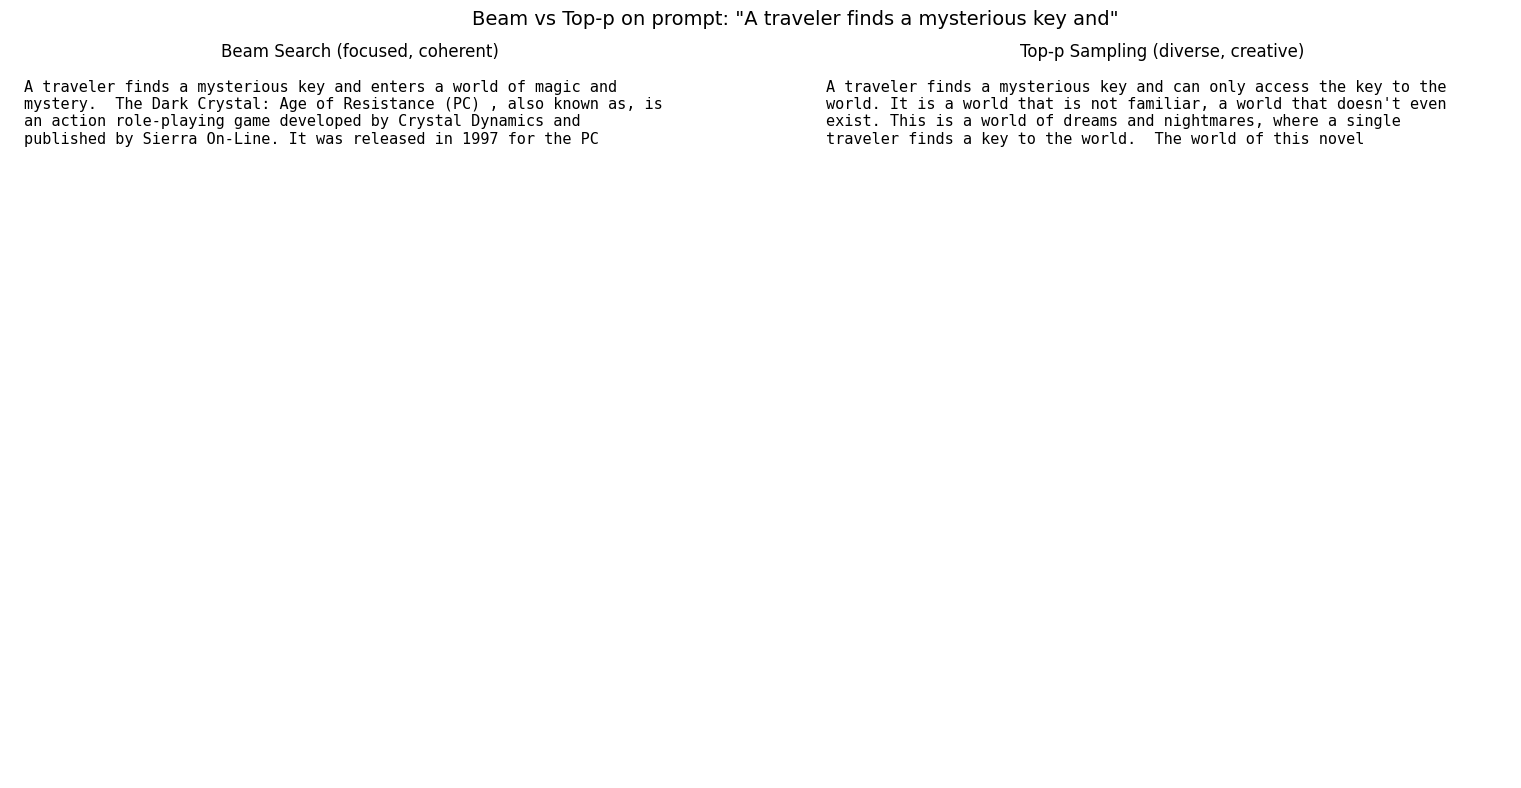

In [25]:
# Q5: Visual compare beam search vs top-p sampling
import torch

prompt = "A traveler finds a mysterious key and"
ids = tokenizer.encode(prompt, return_tensors="pt").to(device)

# Beam search (deterministic)
beam_out = model.generate(
    ids,
    max_length=60,
    num_beams=3,
    no_repeat_ngram_size=2,
    early_stopping=True,
    do_sample=False,
    pad_token_id=tokenizer.eos_token_id
)
beam_text = tokenizer.decode(beam_out[0], skip_special_tokens=True)

# Top-p sampling (stochastic)
torch.manual_seed(2025)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(2025)
sample_out = model.generate(
    ids,
    max_length=60,
    do_sample=True,
    top_p=0.9,
    temperature=0.9,
    pad_token_id=tokenizer.eos_token_id
)
sample_text = tokenizer.decode(sample_out[0], skip_special_tokens=True)

# Plot side-by-side
def wrap(t):
    return "\n".join(textwrap.wrap(t, width=70))

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].text(0.02, 0.98, wrap(beam_text), va='top', ha='left', fontsize=11, family='monospace')
axes[0].set_title('Beam Search (focused, coherent)')
axes[0].axis('off')

axes[1].text(0.02, 0.98, wrap(sample_text), va='top', ha='left', fontsize=11, family='monospace')
axes[1].set_title('Top-p Sampling (diverse, creative)')
axes[1].axis('off')

fig.suptitle('Beam vs Top-p on prompt: "' + prompt + '"', fontsize=14)
plt.tight_layout()
plt.show()